In [1]:
import pandas as pd
import numpy as np
import sys
import math
import matplotlib.pyplot as plt

In [2]:
# modeling 1 neuron with four inputs
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias
print(output)

4.8


In [3]:
# modeling 3 neurons with four inputs
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1.0], [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87] ]
biases = [2, 3, 0.5]

# this is gross way of doing it
layer_output = [] 
for neuron_weights, neuron_bias in  zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    layer_output.append(neuron_output)
print(layer_output)

[4.8, 1.21, 2.385]


## Shape

- def: at each dimension what is the size of that dimension 
##### ex1: 
- l = [1,2,3,4] 
    - then shape: (4,)
    - also known as 1D array, or vector
##### ex2:
- lol = [[1,2,3,4], [5,6,7,8]]
    - then shape (2,4)
    - also known as 2D array,  Matrix
##### ex3:
- lolol = [[[1,2,3,4], [1,2,3,4]], [[1,2,3,4], [1,2,3,4]], [[1,2,3,4], [1,2,3,4]]]
    - then shape (3,2,4)
    - 3D array

## TENSOR
Def: an object that CAN be represented as an array

In [4]:
# using numpy 

inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
output = np.dot(weights, inputs) + biases
# IMPORTANT -> the first element you pass is where it
# is going to be indexed. dot.(BIGGER_SHAPE, SMALLER_SHAPE)
print(output)

[4.8   1.21  2.385]


In [5]:
# Using Batches   
inputs = [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5], 
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_output = np.dot(inputs, np.array(weights).T) + biases
# Sizes must Match (3,4)*(4,3) ##LINEAR ALGEBRA
layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2

print(layer2_output)


[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [6]:
# Now we strat programing - 
# we denote the input data with capital X
np.random.seed(0)

X = [[1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
# for newural networks we tend to want 
# to keep everything in the range of -1 -> 1

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
layer2.forward(layer1.output)
print(layer2.output)

[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


# Activation Functions 
- def: An activation function refers to the operation that will be conducted by each neruon, it can be a hidden layer neuron or an output layer neuron. 
hence f(x) = OUTPUT s.t. x = sum(input*weight) + bias

    - Step function: f(x) = 1 for x > 0 , 0 oth 
    - Sigmoid function: f(x) = 1/(1+exp(-x))
    - rectified linear: f(x) = x for x > 0, 0 oth 
    - softmax function: f(x) = exp(x)/ sum(exi)

In [7]:
# cretae data 

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

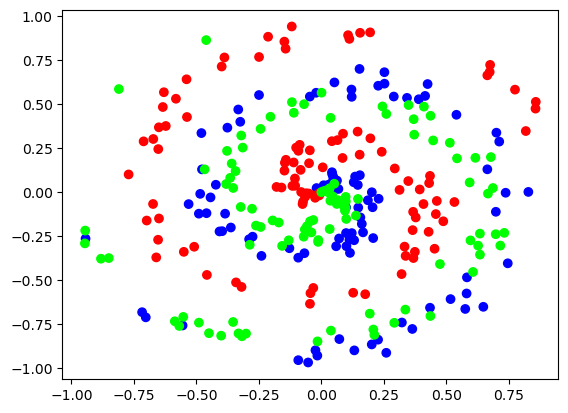

In [8]:
X, y = spiral_data(100, 3)
#plt.scatter(X[:,0], X[:,1])
#plt.show()

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

In [9]:
# Activation Functions 

X = [[1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]]

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
    output.append(max(0, i))
print(output)
        

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [10]:

# rectified linear activation function
X, y = spiral_data(100, 3)
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLu()

layer1.forward(X)

#print(layer1.output)
activation1.forward(layer1.output)
print(activation1.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [6.87588650e-04 0.00000000e+00 1.57626540e-06 9.06900555e-04
  1.42693039e-03]
 [0.00000000e+00 0.00000000e+00 9.47135389e-04 9.62997659e-04
  1.77594169e-03]
 ...
 [7.54987797e-02 0.00000000e+00 0.00000000e+00 8.25756774e-02
  1.25843696e-01]
 [6.90425586e-02 9.28127658e-03 0.00000000e+00 3.87323371e-02
  4.83789970e-02]
 [7.41074638e-02 0.00000000e+00 0.00000000e+00 4.91825208e-02
  6.57264575e-02]]


In [11]:
# Softmax Activation Function
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]

exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)
print(norm_values)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


In [12]:

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
        
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLu()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])


[[0.33333333 0.33333333 0.33333333]
 [0.33331914 0.33334935 0.33333151]
 [0.33330025 0.33337402 0.33332573]
 [0.33322437 0.33350374 0.33327189]
 [0.33318798 0.33356036 0.33325166]]


# Loss Function
Li = -sum(yj log(y*j)) for all js
- Li: Sample loss value
- i: ith sample in a set
- j: output index
- y: target values
- y*: predicted values

Li = -log(y*)

In [13]:
# Loss Function of Choice

softmax_output = [0.7, 0.1, 0.2]
target_ouput = [1, 0, 0]
target_class = 0 
loss = -(np.log(softmax_output[0])*target_ouput[0] + 
         np.log(softmax_output[1])*target_ouput[1] + 
         np.log(softmax_output[2])*target_ouput[2])
 
 
# same but bigger

softmax_outputs =  np.array([[0.7, 0.1, 0.2],
                             [0.1, 0.5, 0.4],
                             [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
average_loss = np.mean(neg_log)

In [14]:

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        negative_log_likelihood = -np.log(correct_confidences)
        return negative_log_likelihood
    
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLu()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)
    
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output, y) # where activation2 was the output after the softmax layer

print(loss)

1.0986177434411029


In [15]:
# Excercice trying to aoptimize weights and biases 
# RANDOM improvements ON PREVIOUS BEST COMBINATION

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        negative_log_likelihood = -np.log(correct_confidences)
        return negative_log_likelihood

X, y = spiral_data(50,2)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLu()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    print(iteration)
    
    dense1.weights += 0.05* np.random.randn(2,3)
    dense1.biases += 0.05* np.random.randn(1,3)
    dense2.weights += 0.05* np.random.randn(2,3)
    dense2.biases += 0.05* np.random.randn(1,3)
    
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', acc)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    


0


ValueError: operands could not be broadcast together with shapes (3,3) (2,3) (3,3) 

In [16]:
# RANDOM improvements ON PREVIOUS BEST COMBINATION

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        negative_log_likelihood = -np.log(correct_confidences)
        return negative_log_likelihood

X, y = spiral_data(50,3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLu()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    print(iteration)
    
    dense1.weights += 0.05* np.random.randn(3,3)
    dense1.biases += 0.05* np.random.randn(1,3)
    dense2.weights += 0.05* np.random.randn(2,3)
    dense2.biases += 0.05* np.random.randn(1,3)
    
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', acc)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

0


ValueError: operands could not be broadcast together with shapes (2,3) (3,3) (2,3) 

# Partial Derivative 
f(x,y,z) --> df/dx , df/dy, df/dz 
- hence:
f(x,y) = max(x,y) --> df/dx = 1(x>y)

In [17]:
# Code for a forward pass of an example neural network model

loss = -np.log(
    np.sum(
        y * np.exp(
            np.dot(
                np.maximum(
                    0,
                    np.dot(
                        np.maximum(
                            0,
                            np.dot(
                                X,
                                w1.T
                            ) + b1
                        ),
                        w2.T
                    ) + b2 
                ),
                w3.T
            ) + b3
            ) / 
            np.sum(
                np.exp(
                    np.dot(
                        np.maximum(
                            0,
                            np.dot(
                                np.maximum(
                                    0,
                                    np.dot(
                                        X,
                                        w1.T
                                    ) + b1
                                ),
                                w2.T
                            ) + b2 
                        ),
                        w3.T
                    ) + b3
                ),
                axis = 1,
                keepdims= True   
            )
        )
)
            

NameError: name 'w1' is not defined

In [18]:
# Aplication aprtial derivative

# Forward pass
x = [1,-2,3]
w = [-3,-1,2]
b = 1

z = x[0]*w[0] + x[1]*w[1] + x[2]*w[2] + b
y = max(z, 0) # ReLu 

# Backward pass
dvalue = 1 # the derivative from the next layer

drelu_dz = (1. if z>0 else 0.) # Derivative of ReLu and the chain rule 

dsum_dxw0 = 1 #partial derivatives od the multiplication (the chain rule)
dsum_dxw1 = 1 
dsum_dxw2 = 1 
dsum_db = 1 
drelu_dxw0 = drelu_dz * dsum_dxw0 
drelu_dxw1 = drelu_dz * dsum_dxw1 
drelu_dxw2 = drelu_dz * dsum_dxw2 
drelu_db = drelu_dz * dsum_db

drelu_dx0 = drelu_dxw0 * w[0] # = dvalue * (1. if z > 0 else 0) * w[0]
drelu_dw0 = drelu_dxw0 * x[0]
drelu_dx1 = drelu_dxw1 * w[1]
drelu_dw1 = drelu_dxw1 * x[1]
drelu_dx2 = drelu_dxw2 * w[2]
drelu_dw2 = drelu_dxw2 * x[2]

# hence: 

dx = [drelu_dx0, drelu_dx1, drelu_dx2]
dw = [drelu_dw0, drelu_dw1, drelu_dw2]
db = drelu_db



In [19]:
dvalues = np.array([[1.,1.,1.],
                    [2.,2.,2.],
                    [3.,3.,3.]])
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T
inputs = np.array([[1, 2, 3, 2.5],
                    [2, 5, -1, 2],
                    [-1.5, 2.7, 3.3, -0.8]])
biases = np.array([[2, 3, 0.5]])

# Forward Pass
layer_outputs = np.dot(inputs, weights) + biases #Dense layer
relu_outputs = np.maximum(0, layer_outputs) # Activation Relu

drelu = relu_outputs.copy()
drelu[layer_outputs <= 0] = 0

#Dense layer
dinputs = np.dot(drelu, weights.T)
dweights = np.dot(inputs.T, drelu)
dbiases = np.sum(drelu, axis=0, keepdims=True)

weights += -0.001 * dweights
biases += -0.001 * dbiases


In [20]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
        
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)
        
class Activation_ReLu:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
        
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0
        
class Activation_Softmax:
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
    
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1,1)
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        negative_log_likelihood = -np.log(correct_confidences)
        return negative_log_likelihood
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs/samples
        
class Activation_Softmax_Loss_CategoricalCrossentropy():
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
        
    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs/ samples

In [21]:
# hence , ex:
from timeit import timeit

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = np.array([0,1,1])

def f1():
    softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
    softmax_loss.backward(softmax_outputs, class_targets)
    dvalues1 = softmax_loss.dinputs
    return dvalues1
def f2():
    activation = Activation_Softmax()
    activation.output = softmax_outputs
    loss = Loss_CategoricalCrossentropy()
    loss.backward(softmax_outputs, class_targets)
    activation.backward(loss.dinputs)
    dvalues2 = activation.dinputs
    return dvalues2

dvalues1 = f1()
dvalues2 = f2()

print('Gradients: combined loss and activation:')
print(dvalues1)
print(timeit(lambda: f1(), number=10000))

print('Gradients: separate loss and activation:')
print(dvalues2)
print(timeit(lambda: f2(), number=10000))

# Activation_Softmax_Loss_CategoricalCrossentropy 
    # is more than 3 times faster

Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
0.045813457982148975
Gradients: separate loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
0.16604754200670868


In [22]:
X, y = spiral_data(100, 3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLu()
dense2 = Layer_Dense(3,3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)

loss = loss_activation.forward(dense2.output, y)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy =  np.mean(predictions == y)

loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)


[[-1.17499751e-04 -1.43265551e-04  8.32380072e-05]
 [ 1.92023287e-04  2.33166181e-04 -4.43904994e-04]]
[[-0.00059729  0.00074389 -0.00080814]]
[[-9.54246709e-05  1.18841060e-04 -2.34163890e-05]
 [ 8.32452180e-05 -1.94685806e-04  1.11440588e-04]
 [ 3.21183984e-05 -1.12816592e-04  8.06981931e-05]]
[[ 4.86037430e-06 -4.55297371e-06 -3.07400584e-07]]


# Optimizers

In [23]:
# Stochastic Gradient Descent

class Optimizer_SGD:
    def __init__(self, learning_rate=1.0, decay=0.0):
        self.learning_rate = learning_rate
        self.current_leearning_rate = learning_rate
        self.decay = decay 
        self.iterations = 0
        
    def pre_update_params(self):
        if self.decay:
            self.current_leearning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases
    
    def post_update_params(self):
        self.iterations += 1


In [24]:
X, y = spiral_data(100, 3)

dense1 =  Layer_Dense(2, 64)
activation1 = Activation_ReLu()
dense2 = Layer_Dense(64,3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss =  loss_activation.forward(dense2.output, y)

predictions = np.argmax(loss_activation.output, axis =1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)

loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

optimizer.update_params(dense1)
optimizer.update_params(dense2)


In [26]:
X, y = spiral_data(100, 3)

dense1 =  Layer_Dense(2, 64)
activation1 = Activation_ReLu()
dense2 = Layer_Dense(64,3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD(1, 1e-3)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss =  loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis =1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch},' +
            f'acc: {accuracy:.3f},' + 
            f'loss: {loss:.3f}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0,acc: 0.270,loss: 1.099
epoch: 100,acc: 0.437,loss: 1.078
epoch: 200,acc: 0.443,loss: 1.063
epoch: 300,acc: 0.443,loss: 1.062
epoch: 400,acc: 0.440,loss: 1.060
epoch: 500,acc: 0.427,loss: 1.058
epoch: 600,acc: 0.430,loss: 1.056
epoch: 700,acc: 0.430,loss: 1.054
epoch: 800,acc: 0.427,loss: 1.051
epoch: 900,acc: 0.440,loss: 1.045
epoch: 1000,acc: 0.413,loss: 1.053
epoch: 1100,acc: 0.400,loss: 1.049
epoch: 1200,acc: 0.403,loss: 1.046
epoch: 1300,acc: 0.413,loss: 1.039
epoch: 1400,acc: 0.447,loss: 1.038
epoch: 1500,acc: 0.420,loss: 1.021
epoch: 1600,acc: 0.423,loss: 1.046
epoch: 1700,acc: 0.527,loss: 0.981
epoch: 1800,acc: 0.453,loss: 0.956
epoch: 1900,acc: 0.497,loss: 0.935
epoch: 2000,acc: 0.550,loss: 0.909
epoch: 2100,acc: 0.503,loss: 0.903
epoch: 2200,acc: 0.570,loss: 0.879
epoch: 2300,acc: 0.513,loss: 0.872
epoch: 2400,acc: 0.550,loss: 0.850
epoch: 2500,acc: 0.597,loss: 0.819
epoch: 2600,acc: 0.593,loss: 0.812
epoch: 2700,acc: 0.570,loss: 0.822
epoch: 2800,acc: 0.593,loss: 0.7